# O que é o algoritmo KNN (k-Nearest Neighbor)?

O KNN é um algoritmo de aprendizagem supervisionado. Ele utiliza os labels (ou categorias) das classes  presentes nos dados de treinamento durante a **fase de aprendizagem**. É um algoritmo baseado em instâncias, onde novos pontos de dados são classificados baseados nas instâncias armazenados e categorizadas. KNN pode ser utilizado para classificação e regressão. Porém, é mais utilizado para **classificação**.

O *k* no KNN é uma variável crucial, também conhecida como hiperparâmetro, e auxilia determinando a acurácia do ponto de dado classificado. Além disso, o *k* é o número de vizinhos mais próximos que se deseja utilizar quando classificando um novo ponto.

![bla](./imgs/knn_judment.png)

Pode-se observar que enquanto o valor de *k* aumenta de 1 a 7 o limite de decisão entre as duas classes contendo os pontos de dados se torna mais suave.

---

#### Então, como o algoritmo funciona?

* Primeiramente, os dados são carregados e inicializado o valor de *k*,
* Então, a distância entre os pontos de dado armazenados e um novo ponto que se deseja classificar é calculado usando diversas similaridades ou métridas de distância, como a distância de Manhattan (L1), distância Euclidiana (L2), similaridade do cosseno, distância de Bhattacharyya, distância de Chebyshev, etc.
* A seguir, os valores das distâncias são ordenados em ordem crescente ou decrescente e os k-próximos vizinhos mais perto ou longe são determinados.
* A classe dos *k* vizinhos mais próximos são agrupados, e o voto da maioria, ou o voto com peso é usado para classificar o novo ponto de dado. 
* Finalmente, a classe predita para a nova instância é retornada.

A predição pode ser de dois tipos: **classificação**, na qual uma classe atribuída ao novo dado, ou **regressão**, no qual um valor é atribuído ao novo dado. Diferentemente da classificação, na regressão a média de todos os *k* vizinhos mais próximos é atribuído para o novo dado.

---

#### Desvantagens do KNN

Primeiramente, a complexidade na busca pelo vizinho mais próximo para todos os novos dados de entrada. Segundo, a determinação do valor de *k* pode ser tornar uma tarefa entediante. Finalmente, não é completamente claro qual o tipo de métrica de distância que deveria ser utilizada na computação dos vizinhos mais próximos.

---

Este material é baseado no tutorial encontrado [aqui](https://www.datacamp.com/community/tutorials/introduction-machine-learning-python).

## Carregando os dados das Iris

A base de dados consiste em 150 amostras com três classes diferentes: **Iris-Setosa**, **Iris-Versicolor** e **Iris-Virginica**. Quatro atributos (features) contribuem para a identificação única de uma das três classes: **sepal-length** (comprimento da sépala), **sepal-width** (largura da sépala), **petal-length** (comprimento da pétala) e **petal-width** (largura da pétala).

---

**Sklearn** é a biblioteca em python para machine learning utilizado por cientistas de dados. A biblioteca permite o uso de vários algoritmos de classificação, regressão e clustering, incluindo SVM, random forests, gradient boosting, k-means, KNN, etc. Na biblioteca sklearn você encontra outra biblioteca contendo bases dados (datasets), incluindo a base de dados **Iris**.

In [1]:
from sklearn.datasets import load_iris

**load_iris** contém os dados e os rótulos de classificação para cada amostra. Abaixo extraímos a informação dos dados.

In [2]:
data = load_iris().data

A variável **data** é um array numpy de formato (150,4), contendo 150 amostras com 4 diferentes atributos cada. Cada classe contém 50 amostras.

In [3]:
data.shape

(150, 4)

Agora vamos extrair os rótulos das classes.

In [4]:
labels = load_iris().target

In [5]:
labels.shape

(150,)

A seguir, precisamos combinar os dados e os rótulos das classes. Para isso utilizamos a biblioteca numpy para tratar arrays multidimensionais.

In [6]:
import numpy as np

Como **data** é um array bidimensional, primeiro vamos reajustar o formato de **labels** também para um array 2D.

In [7]:
labels = np.reshape(labels,(150,1))

Agora, faremos a concatenação usando a função **concatenate**. O valor de **axis=-1** indica que a concatenação ocorre na segunda dimensão.

In [8]:
data = np.concatenate([data,labels],axis=-1)

In [9]:
data.shape

(150, 5)

A seguir importaremos a biblioteca **pandas** usada para tabular os dados e computar de forma mais intuitiva.

In [10]:
import pandas as pd

In [11]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.DataFrame(data,columns=names)

O dataframe **dataset** contém todos os dados com os atributos e a classificação que precisamos.

Agora iremos converter os valores numéricos dos rótulos para os nomes da flor ou espécie. Para tal, usaremos a coluna das **species** para fazer a substituição.

In [12]:
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

In [13]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Análise dos dados

Para entender melhor os dados, vamos ver como as flores são no mundo real e quais as diferenças entre as classes.

![flores](./imgs/iris-machinelearning.png)

Outra forma de visualizar os seus dados é por meio de gráficos de pontos (ou **scatterplot**). Desta forma podemos ver como as variáveis afetam na classificação das flores. 

Usamos a biblioteca **matplotlib** para esta visualização.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

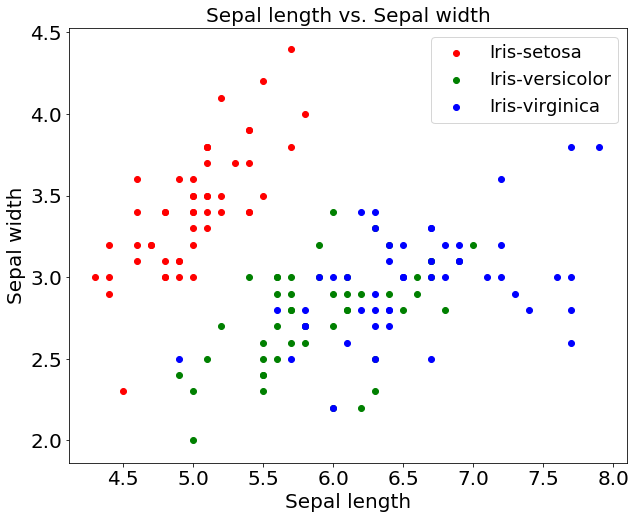

In [15]:
plt.figure(4, figsize=(10, 8))

plt.scatter(data[:50, 0], data[:50, 1], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 0], data[50:100, 1], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')

plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})

Do gráfico acima, é bastante aparente que existe uma correlação alta entre a Iris setosa com a largura e comprimento da sépala. Em contrapartida, existe uma menor correlação entre a Iris versicolor e a Iris virginica. Os pontos destas duas últimas espécies estão mais espalhados do que a setosa.

Plotemos também o gráfico para o comprimento e largura da pétala.

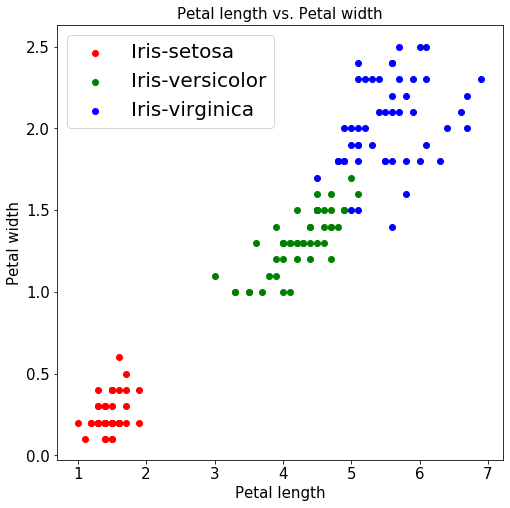

In [16]:
plt.figure(4, figsize=(8, 8))

plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})

Esta seleção de atributos também mostra uma forte clusterização da iris setosa em comparação com as outras duas categorias.

Em seguida, calculemos a correlação entre os atributos da pétala.

In [17]:
dataset.iloc[:,2:].corr()

,petal-length,petal-width
petal-length,1.000000,0.962865
petal-width,0.962865,1.000000


O resultado acima indica uma forte correlação de 0.96 entre o comprimento e a largura da pétala quando todos os dados são combinados.

Agora, vamos analisar a correlação entre todas as três espécies em separado.

In [18]:
# setosa
dataset.iloc[:50,:].corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


In [19]:
# versicolor
dataset.iloc[50:100,:].corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.525911,0.754049,0.546461
sepal-width,0.525911,1.000000,0.560522,0.663999
petal-length,0.754049,0.560522,1.000000,0.786668
petal-width,0.546461,0.663999,0.786668,1.000000


In [20]:
# virginica
dataset.iloc[100:,:].corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.457228,0.864225,0.281108
sepal-width,0.457228,1.000000,0.401045,0.537728
petal-length,0.864225,0.401045,1.000000,0.322108
petal-width,0.281108,0.537728,0.322108,1.000000


Dos resultados acima, vemos que a correlação entre **petal-legth** e **petal-width** da setosa e virginica são 0.33 e 0.32 respectivamente. Para a versicolor, a correlação é de 0.78.

Agora vamos visualizar a distribuição por meio de histogramas.

/Users/eric/Documents/KNN_Iris/.venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120d689b0>,
      dtype=object)

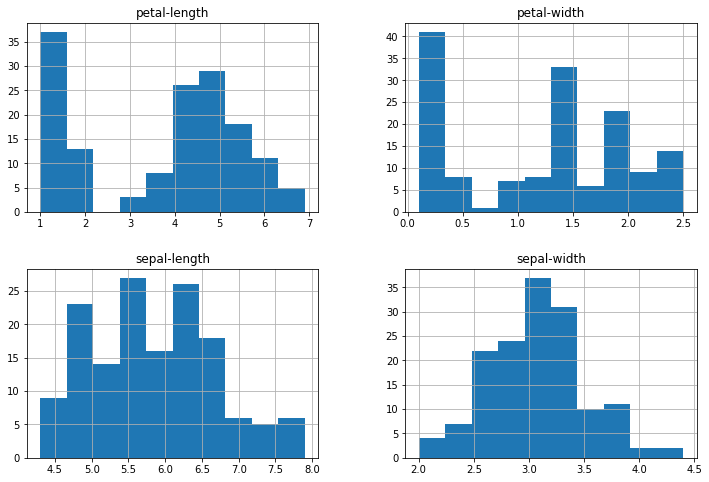

In [21]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca()
dataset.hist(ax=ax)

As variáveis **petal-length**, **petal-width** e **sepal-length** mostram uma distribuição unimodal enquanto **sepal-width** mosta uma distribuição gaussiana. Essas informações são úteis pois podem ajudar na escolha do algoritmo que funcione bem com este tipo de distribuição.

A seguir, analisaremos se os quatro atributos estão na mesma escala ou não. Esta é uma parte importante em ML. **pandas** tem uma função chamada **describe** que retorna **count**, **mean**, **max** e **min** de todos os dados da tabela.

In [22]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Os quatro atributos apresentam escala similar, entre 0 e 8, e estão em centímetros caso queira tornar a escala entre 0 e 1.

O número de amostras para cada classe é de 50, ou aproximadamente 33,3%.

In [23]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Pré-processamento dos dados

Após carregar os dados e fazer uma extensiva análise, é hora de preparar os dados para alimentar o modelo da ML. Aqui iremos pré-processar os dados de duas formas: normalizando os dados e dividindo os dados em dois conjuntos de treinamento e teste.

---

#### Normalizando os dados

Existem duas formas para normalizar os dados:

* Normalização por exemplo, onde cada amostra é normalizada separadamente,
* Normalização por atributo, no qual cada atributo é normalizado da mesma forma para todas as amostras.

Agora a pergunta é por que ou quando precisamos normalizar nossos dados? E precisamos normalizar o dados da base **Iris**?.

A resposta é quase o tempo todo. É uma boa prática normalizar os dados pois assim todas as amostras ficam na mesma escala e limites. Normalizar os dados é importante quando a base não é consistente. Inconsistências podem ser checadas usando a função **describe()**, que nos dá os valores máximo e mínimo. Se esses valores são significantemente diferentes de um atributo para outro, então normalizar para a mesma escala é muito importante.

Digamos que X é um atributo com a maior diferença entre min e max, e Y é o segundo atributo com a menor diferença. Então, a influência do atributo Y pode ser suprimido pela influência do atributo X. Neste caso, é importante normalizar ambos atributos.

Na base de dados do nosso problema não é necessário normalizar.

---

### Separando os dados

Este é outro aspecto importante de ML uma vez que o objetivo é fazer o modelo capaz de tomar decisões ou classificar dados em um ambiente de testes sem intervenção humana. Assim, antes de lançar o seu modelo no mercado, é necessário ter certeza que o modelo pode generalizar em dados de teste.

Para este propósito, é necessário um conjunto de treinamento e um conjunto de testes. Voltando à nossa base de dados **Iris**, temos 150 amostras. Usaremos 80% dos dados para treinamento e os 20% restantes para teste.

Quando estiver trabalhando com ciência de dados, ouvirá constantemente o termo **overfitting**, o qual significa que o seu modelo aprendeu os dados de treinamento muito bem, mas falha em acertar com os dados de teste. Desta forma, separando os dados em treinamento e teste ajuda a identificar se o modelo está tendo **overfit** ou não.

A biblioteca sklearn tem funções internas para separar os dados. Neste caso usaremos **train_test_split**.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_data, test_data, train_label, test_label = train_test_split(
                                                                dataset.iloc[:,:3], 
                                                                dataset.iloc[:,4], 
                                                                test_size=0.2, 
                                                                random_state=42
                                                              )

Repare que o atributo **random_state** é a semente para a geração aleatória da divisão dos dados. Se mudar o valor desta variável, uma nova seleção dos dados é feita.

Vejamos o formato dos resultados obtidos.

In [26]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((120, 3), (120,), (30, 3), (30,))

Agora iremos alimentar nosso algoritmo.

## O modelo KNN

Após carregar, analizar e pré-processar os dados, é hora de alimentar os dados no modelo KNN. Para tal, usaremos as função **neighbors** da biblioteca **sklearn** que tem uma classe chamada **KNeighborsClassifier**.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

*Obs.: o valor k (n_neighbors) é geralmente ímpar para evitar empates nas votações.

Para decidir o melhor valor para o parâmetro *k*, é preciso fazer um *grid-search*. O modelo será testado com 10 valores diferentes para *k* e o que der melhor resultado será utilizado.

Inicia-se a variável **neighbors(k)** que determina os valores de 1 a 9 e duas matrizes de zeros nomeadas **train_accuracy** e **test_accuracy** para a acurácia do treinamento e teste. Esses vetores serão importantes mais tarde para plotar o gráfico que indicará o melhor valor para **neighbor**.

In [28]:
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

A parte a seguir é onde toda a "mágica" acontece. Iremos iterar (**enumerate**) sobre os nove valores para vizinhos e para cada um deles iremos prever os dados de treinamento e teste. Ao fim, armazenaremos a acurácia nos vetores **train_accuracy** e **test_accuracy**.

In [29]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(train_data, train_label)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)

Plotemos os resultados para decisão de qual o melhor número de vizinhos.

(array([0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02]),
 <a list of 8 Text yticklabel objects>)

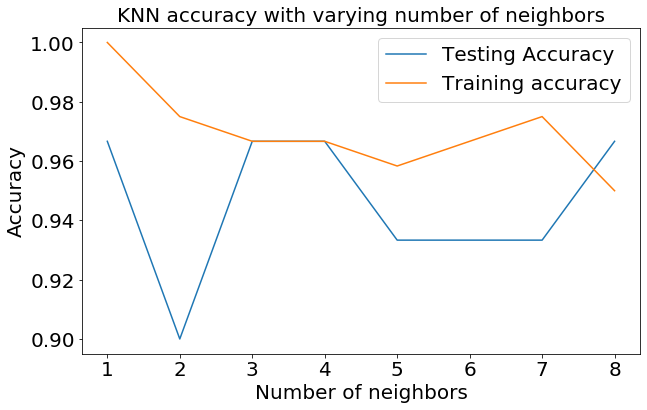

In [30]:
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Olhando o gráfico, o valor **n_neighbors=3** apresenta os melhores resultados para ambos os conjuntos. Então definimos que 3 é o valor ideal e executemos o treinamento uma vez mais.

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

## Avaliando o modelo

Nesta última parte iremos avaliar o modelo no conjunto de testes usando algumas técnicas como **confusion_matrix** e **classification_report**.

Vamos primeiro checar a acurácia do modelo nos dados de teste.

In [32]:
test_accuracy

0.9666666666666667

O seu modelo consegue prever 96,66% dos dados de teste corretamente.

---

#### Confusion matrix

A matriz de confusão é principalmente utilizada para descrever o desempenho do nosso modelo nos dados de teste para os quais os valores verdadeiros ou rótulos são conhecidos.

Existe uma função dentro do **scikit-learn** que provê uma função para calcular a matriz de confusão automaticamente.

In [33]:
prediction = knn.predict(test_data)

Text(0.5, 1, 'Confusion Matrix')

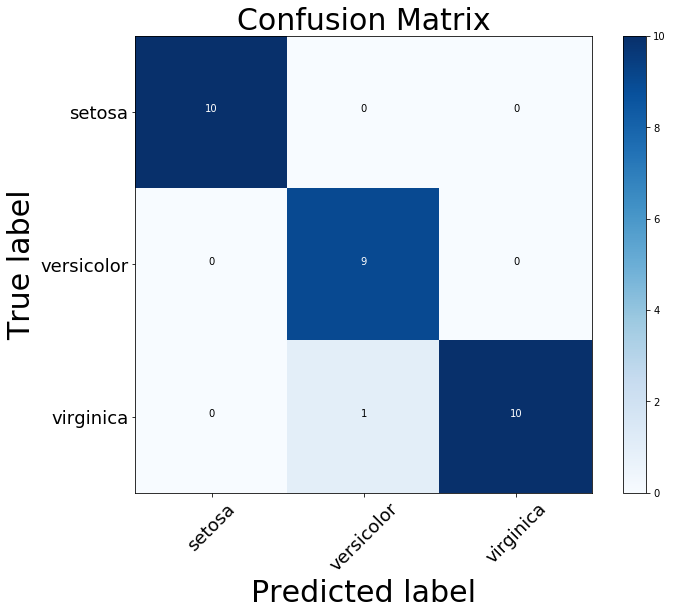

In [34]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
class_names = load_iris().target_names


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)

Do gráfico acima pode-se ver que todas as flores foram classificadas corretamente, exceto uma virginica que foi classificada como versicolir.

#### Classification report

O relatório de classificação ajuda na identificação de classes classificadas incorretamente em mais detalhes. Para tal, os valores da precisão, recall e F1 são dados para cada classe.

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

